In [23]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [24]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화

In [25]:
print(len(x_train), len(x_test))

60000 10000


In [48]:
 # tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)
print(train_size)
print(len(val_ds))

42000
900


In [49]:
len(train_ds) # 2100개 묶음. update 2100 times in one epoch

2100

In [50]:
print(len(x_test))

10000


In [51]:
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [52]:
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [53]:
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
2100/2100 [==============================] - 5s 2ms/step - loss: 0.9402 - accuracy: 0.7097 - val_loss: 0.4038 - val_accuracy: 0.8873
Epoch 2/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3663 - accuracy: 0.8939 - val_loss: 0.3110 - val_accuracy: 0.9091
Epoch 3/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3014 - accuracy: 0.9136 - val_loss: 0.2675 - val_accuracy: 0.9233
Epoch 4/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9243 - val_loss: 0.2450 - val_accuracy: 0.9282
Epoch 5/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2417 - accuracy: 0.9304 - val_loss: 0.2321 - val_accuracy: 0.9337
Epoch 6/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2217 - accuracy: 0.9369 - val_loss: 0.2173 - val_accuracy: 0.9370
Epoch 7/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2107 - accuracy: 0.9392 - val_loss: 0.1987 - val_accuracy:

In [32]:
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)

모델 평가
313/313 [==============================] - 1s 1ms/step - loss: 0.1486 - accuracy: 0.9572


[0.14859957993030548, 0.9571999907493591]

In [33]:
# 모델 정보 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 모델 저장
model.save('mnist_model.h5')

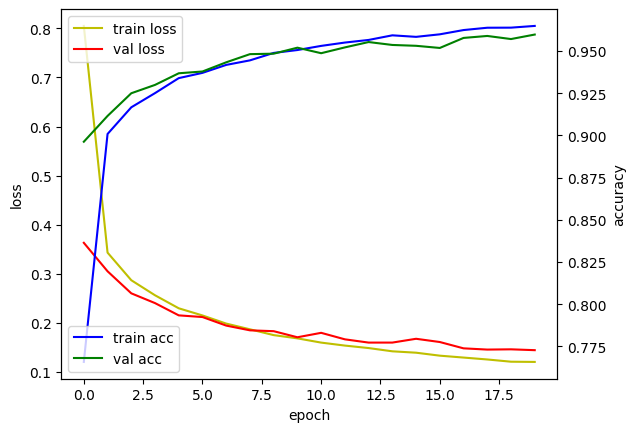

In [35]:
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()